## Dependencies

### Library Installation (if needed)

In [1]:
#! pip install -qUr requirements.txt

In [2]:
from methods.screener_methods import *
from tqdm import tqdm
import pandas as pd

### Single import

HVID.CO


,Ticker,Name,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,P/B Score,D/E Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,HVID.CO,Hvidbjerg Bank A/S,0.18,0.1,0.08,0.09,0.73,-0.79,0.08,0,...,1.35,96.76,1.27,NaN,0.0,0.15,Financial Services,Banks - Regional,Denmark,False


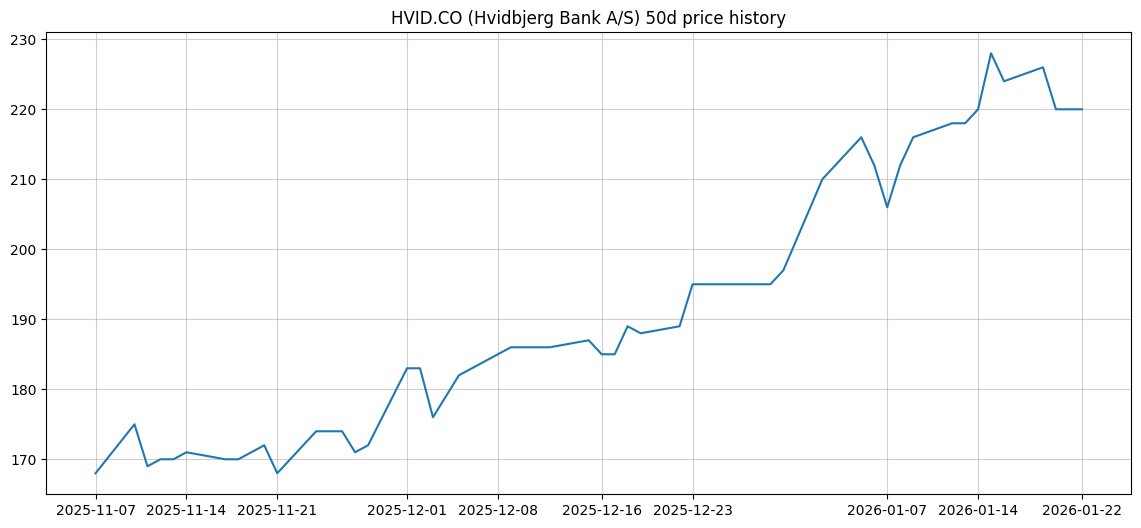

50d Average Change%: 0.15


In [3]:
symbol = "HVID.CO"
stock = Stock(symbol)
print(stock.symbol)
display(stock.summary())
stock.price_graph("50d")
print(f"50d Average Change%: {round(stock.momentum, 2)}")

### Screener

In [4]:
symbol_list = "simple" #"simple", "danish", "filtered", "all"

if symbol_list == "all":
    symbols = (
        pd.read_csv("../data/tickers/tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist() + 
        pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].to_list()
    )
elif symbol_list == "filtered":
    symbols = pd.read_csv("../data/tickers/screener_filtered_tickers.csv")["Ticker"].tolist()
elif symbol_list == "danish":
    symbols = pd.read_csv("../data/tickers/danish_tickers.csv")["Ticker"].tolist()
else:
    symbols = pd.read_csv("../data/tickers/simple_tickers.csv")["Ticker"].tolist()
symbols = list(set(symbols))

In [5]:
import sys, io
df = pd.DataFrame()
for symbol in tqdm(symbols, smoothing=0):
    old_stderr = sys.stderr
    sys.stderr = io.StringIO()
    try:
        df = pd.concat([df, Stock(symbol).summary()])
    except Exception:
        pass
    finally:
        sys.stderr = old_stderr
df = df.sort_values(by="Final Score", ascending=False)
display(df)
if symbol_list == "simple":
    df.to_csv("../data/screener_results/simple_screener_results.csv", index=False)
elif symbol_list == "danish":
    df.to_csv("../data/screener_results/danish_screener_results.csv", index=False)
elif symbol_list == "filtered" or symbol_list == "all":   
    df.to_csv("../data/screener_results/screener_results.csv", index=False)
    df["Ticker"].to_csv("../data/tickers/screener_filtered_tickers.csv", index=False)

100%|██████████| 83/83 [00:49<00:00,  1.68it/s]


,Ticker,Name,Final Score,Value Score,Momentum Score,Leadership Score,P/E Score,ROA Score,P/B Score,D/E Score,...,ROA%,EPS,P/B,D/E,Insider Buy%,50d Average Change%,Sector,Industry,Country,Owned
0,BAVA.CO,Bavarian Nordic A/S,3.29,2.37,0.92,0.36,0.95,0.83,0.09,0.14,...,7.78,30.70,1.19,0.01,0.0,0.05,Healthcare,Biotechnology,Denmark,False
0,HLUN-A.CO,H. Lundbeck A/S A,2.76,1.77,0.98,0.02,0.80,0.85,0.05,0.04,...,8.28,3.84,1.52,0.49,0.0,0.08,Healthcare,Drug Manufacturers - Specialty & Generic,Denmark,True
0,MTHH.CO,MT Højgaard Holding A/S,2.67,1.60,1.08,0.20,0.70,0.71,-0.14,0.13,...,6.62,44.91,3.51,0.20,0.0,0.10,Industrials,Engineering & Construction,Denmark,True
0,TRMD,TORM plc,2.47,1.80,0.66,0.16,0.89,0.58,0.10,0.08,...,5.99,2.73,1.02,0.42,0.0,0.05,Energy,Oil & Gas Midstream,United Kingdom,True
0,NOVO-B.CO,Novo Nordisk B A/S,2.09,1.09,1.01,0.15,0.20,0.90,-0.15,-0.01,...,21.11,23.33,10.38,0.60,0.0,0.20,Healthcare,Drug Manufacturers - General,Denmark,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,BETCO-DKK.CO,Better Collective A/S,-0.75,-0.85,0.10,0.07,-0.72,-0.36,0.11,0.04,...,3.42,2.99,0.91,0.50,0.0,0.01,Technology,Software - Application,Denmark,False
0,UBER,"Uber Technologies, Inc.",-1.26,-0.98,-0.28,-0.13,-1.09,0.33,-0.15,0.06,...,5.16,1.95,6.11,0.46,-1.7,-0.04,Technology,Software - Application,United States,False
0,HIMS,"Hims & Hers Health, Inc.",-1.37,-0.75,-0.62,-0.00,-1.10,0.46,-0.15,-0.15,...,5.54,0.53,11.88,1.92,39.3,-0.15,Healthcare,Drug Manufacturers - Specialty & Generic,United States,False
0,TSLA,"Tesla, Inc.",-1.42,-1.62,0.20,0.15,-1.10,-0.65,-0.15,0.13,...,2.35,1.47,18.65,0.17,0.6,0.02,Consumer Cyclical,Auto Manufacturers,United States,False
